Cross validation was used to determine if the model trained on the NY Data for the year 2014 would determine a consistent R_Squared value for the 2013 data. The R_Squared value for the 2014 model the linear regression model is based on is 0.1212. The 2013 data was analyzed with the same model, for an R_Squared value of .3026. 

I chose the linear regression with multiple datasets, from different years, for the same state, thinking the data would correlate best.

In [1]:
import math
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
from statsmodels.sandbox.regression.predstd import wls_prediction_std

%matplotlib inline
sns.set_style('white')

In [2]:
from sklearn import linear_model
pd.options.display.float_format = '{:.3f}'.format

# Suppress annoying harmless error.
import warnings
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

In [3]:
# Not sure this is the best approach, but this allows me to create the per capita dataframe w/out slice errors
pd.options.mode.chained_assignment = None  # default='warn'

In [4]:
data_raw = pd.read_csv(open('NewYork2014.csv','rU'), encoding='utf-8', engine='c')

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 'U' mode is deprecated
  """Entry point for launching an IPython kernel.


In [5]:
data_raw.dtypes

City                             object
Population                       object
ViolentCrime                     object
Murder                          float64
Rape\n(revised\ndefinition)1     object
Rape2                           float64
Robbery                          object
AggravatedAssault                object
PropertyCrime                    object
Burglary                         object
LarcenyTheft                     object
VehicleTheft                     object
Arson3                          float64
Unnamed: 13                     float64
dtype: object

In [7]:
data_raw['robbery_num'] = pd.to_numeric(data_raw['Robbery'].str.replace(',',''))
data_raw['robbery_cat'] = np.where((data_raw['robbery_num'] > 0),1,0)
data_raw['Murder_Cat']  = np.where((data_raw['Murder'] > 0),1,0)

In [8]:
data_raw['pop_num']          = pd.to_numeric(data_raw['Population'].str.replace(',',''))
data_raw['Burglary']         = pd.to_numeric(data_raw['Burglary'].str.replace(',',''))
data_raw['ViolentCrime']     = pd.to_numeric(data_raw['ViolentCrime'].str.replace(',',''))
data_raw['LarcenyTheft']     = pd.to_numeric(data_raw['LarcenyTheft'].str.replace(',',''))
data_raw['VehicleTheft']     = pd.to_numeric(data_raw['VehicleTheft'].str.replace(',',''))
data_raw['AggravatedAssault'] = pd.to_numeric(data_raw['AggravatedAssault'].str.replace(',',''))
data_raw['PropertyCrime']    = pd.to_numeric(data_raw['PropertyCrime'].str.replace(',',''))
data_raw['pop_squared']      = data_raw['pop_num']**2

In [9]:
data_raw.dtypes

City                             object
Population                       object
ViolentCrime                    float64
Murder                          float64
Rape\n(revised\ndefinition)1     object
Rape2                           float64
Robbery                          object
AggravatedAssault               float64
PropertyCrime                   float64
Burglary                        float64
LarcenyTheft                    float64
VehicleTheft                    float64
Arson3                          float64
Unnamed: 13                     float64
robbery_num                     float64
robbery_cat                       int64
Murder_Cat                        int64
pop_num                         float64
pop_squared                     float64
dtype: object

In [10]:
per_capita_data = data_raw[:-7]

In [11]:
per_capita_data

City Population  ViolentCrime  Murder  \
0                      Adams Village      1,851         0.000   0.000   
1           Addison Town and Village      2,568         2.000   0.000   
2                     Afton Village4        820         0.000   0.000   
3                      Akron Village      2,842         1.000   0.000   
4                            Albany4     98,595       802.000   8.000   
5                    Albion Village4      5,872        26.000   0.000   
6            Alexandria Bay Village4      1,107         0.000   0.000   
7                    Alfred Village4      4,032        11.000   1.000   
8                  Altamont Village4      1,723         1.000   0.000   
9                      Amherst Town4    118,860       128.000   1.000   
10   Amity Town and Belmont Village4      2,250         0.000   0.000   
11                Amityville Village      9,509        12.000   0.000   
12                         Amsterdam     18,099        27.000   0.000   
13                 Angelica Village4        846         1.000   0.000   
14                    Arcade Village      2,030         0.000   0.000   
15                   Ardsley Village      4,561         1.000   0.000   
16                 Asharoken Village        656         0.000   0.000   
17                    Attica Village      2,502         0.000   0.000   
18                     Avon Village4      3,333         2.000   0.000   
19            Baldwinsville Village4      7,485         2.000   0.000   
20             Ballston Spa Village4      5,470         8.000   0.000   
21                          Batavia4     15,223        71.000   0.000   
22                     Bath Village4      5,703        14.000   0.000   
23                           Beacon4     14,330        43.000   0.000   
24                     Bedford Town4     17,782         2.000   0.000   
25                   Bethlehem Town4     34,653        34.000   0.000   
26                       Binghamton4     46,229       305.000   1.000   
27                       Black River      1,392         0.000   0.000   
28              Blooming Grove Town4     11,960         8.000   0.000   
29                       Bolton Town      2,321         0.000   0.000   
..                               ...        ...           ...     ...   
339                   Vernon Village      1,166         1.000   0.000   
340                     Vestal Town4     28,019        11.000   0.000   
341                  Walden Village4      6,847         9.000   0.000   
342                   Wallkill Town4     28,211        43.000   0.000   
343                  Walton Village4      2,980        10.000   0.000   
344                  Warsaw Village4      3,397         5.000   0.000   
345          Washingtonville Village      5,788         2.000   0.000   
346       Waterford Town and Village      8,398         1.000   0.000   
347                Waterloo Village4      5,185        13.000   0.000   
348                       Watertown4     28,009       153.000   0.000   
349                      Watervliet4     10,235        20.000   0.000   
350            Watkins Glen Village4      1,871         2.000   0.000   
351                 Waverly Village4      4,344         4.000   0.000   
352        Webster Town and Village4     44,230        27.000   1.000   
353                Weedsport Village      1,796         2.000   0.000   
354               Wellsville Village      4,576        18.000   0.000   
355               Westfield Village4      3,147         1.000   0.000   
356        Westhampton Beach Village      1,753         2.000   0.000   
357                West Seneca Town4     44,866        38.000   0.000   
358               Whitehall Village4      2,598        13.000   0.000   
359                    White Plains4     58,103       105.000   1.000   
360               Whitesboro Village      3,727         5.000   0.000   
361                  Whitestown Town      9,307         0.000   0.000   
362              

# What's the difference between these two forms of syntax?

In [12]:
per_capita_data['pc_violent_crime'] = (per_capita_data['ViolentCrime']/per_capita_data['pop_num'])*100000

In [13]:
per_capita_data['pc_murder'] = (per_capita_data.Murder/per_capita_data.pop_num)*100000
per_capita_data['pc_Rape2'] = (per_capita_data.Rape2/per_capita_data.pop_num)*100000
per_capita_data['pc_PropertyCrime'] = (per_capita_data.PropertyCrime/per_capita_data.pop_num)*100000
per_capita_data['pc_Burglary'] = (per_capita_data.Burglary/per_capita_data.pop_num)*100000
per_capita_data['pc_LarcenyTheft'] = (per_capita_data.LarcenyTheft/per_capita_data.pop_num)*100000
per_capita_data['pc_VehicleTheft'] = (per_capita_data.VehicleTheft/per_capita_data.pop_num)*100000
per_capita_data['pc_Arson3'] = (per_capita_data.Arson3/per_capita_data.pop_num)*100000


In [14]:
per_capita_data['pc_robbery'] = (per_capita_data.robbery_num/per_capita_data.pop_num)*100000
per_capita_data['pc_aggravated_assault'] = (per_capita_data.AggravatedAssault/per_capita_data.pop_num)*100000

In [15]:
per_capita_data['pc_murder_cat'] = (per_capita_data.Murder_Cat/per_capita_data.pop_num)*100000
per_capita_data['pc_robbery_cat'] = (per_capita_data.robbery_cat/per_capita_data.pop_num)*100000

In [16]:
per_capita_data['pc_pop_squared'] = (per_capita_data.pop_squared/per_capita_data.pop_num)*100000


In [17]:
per_capita_data

City Population  ViolentCrime  Murder  \
0                      Adams Village      1,851         0.000   0.000   
1           Addison Town and Village      2,568         2.000   0.000   
2                     Afton Village4        820         0.000   0.000   
3                      Akron Village      2,842         1.000   0.000   
4                            Albany4     98,595       802.000   8.000   
5                    Albion Village4      5,872        26.000   0.000   
6            Alexandria Bay Village4      1,107         0.000   0.000   
7                    Alfred Village4      4,032        11.000   1.000   
8                  Altamont Village4      1,723         1.000   0.000   
9                      Amherst Town4    118,860       128.000   1.000   
10   Amity Town and Belmont Village4      2,250         0.000   0.000   
11                Amityville Village      9,509        12.000   0.000   
12                         Amsterdam     18,099        27.000   0.000   
13                 Angelica Village4        846         1.000   0.000   
14                    Arcade Village      2,030         0.000   0.000   
15                   Ardsley Village      4,561         1.000   0.000   
16                 Asharoken Village        656         0.000   0.000   
17                    Attica Village      2,502         0.000   0.000   
18                     Avon Village4      3,333         2.000   0.000   
19            Baldwinsville Village4      7,485         2.000   0.000   
20             Ballston Spa Village4      5,470         8.000   0.000   
21                          Batavia4     15,223        71.000   0.000   
22                     Bath Village4      5,703        14.000   0.000   
23                           Beacon4     14,330        43.000   0.000   
24                     Bedford Town4     17,782         2.000   0.000   
25                   Bethlehem Town4     34,653        34.000   0.000   
26                       Binghamton4     46,229       305.000   1.000   
27                       Black River      1,392         0.000   0.000   
28              Blooming Grove Town4     11,960         8.000   0.000   
29                       Bolton Town      2,321         0.000   0.000   
..                               ...        ...           ...     ...   
339                   Vernon Village      1,166         1.000   0.000   
340                     Vestal Town4     28,019        11.000   0.000   
341                  Walden Village4      6,847         9.000   0.000   
342                   Wallkill Town4     28,211        43.000   0.000   
343                  Walton Village4      2,980        10.000   0.000   
344                  Warsaw Village4      3,397         5.000   0.000   
345          Washingtonville Village      5,788         2.000   0.000   
346       Waterford Town and Village      8,398         1.000   0.000   
347                Waterloo Village4      5,185        13.000   0.000   
348                       Watertown4     28,009       153.000   0.000   
349                      Watervliet4     10,235        20.000   0.000   
350            Watkins Glen Village4      1,871         2.000   0.000   
351                 Waverly Village4      4,344         4.000   0.000   
352        Webster Town and Village4     44,230        27.000   1.000   
353                Weedsport Village      1,796         2.000   0.000   
354               Wellsville Village      4,576        18.000   0.000   
355               Westfield Village4      3,147         1.000   0.000   
356        Westhampton Beach Village      1,753         2.000   0.000   
357                West Seneca Town4     44,866        38.000   0.000   
358               Whitehall Village4      2,598        13.000   0.000   
359                    White Plains4     58,103       105.000   1.000   
360               Whitesboro Village      3,727         5.000   0.000   
361                  Whitestown Town      9,307         0.000   0.000   
362              

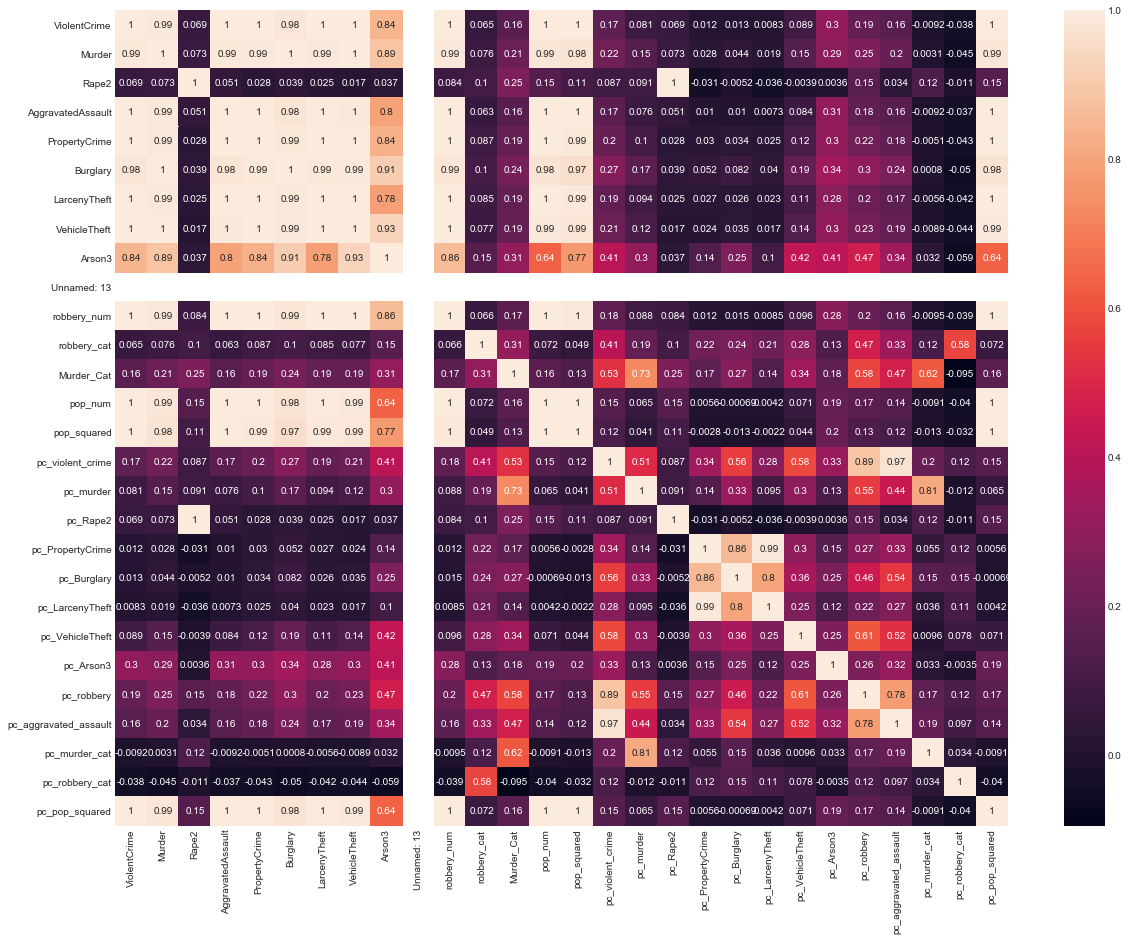

In [18]:
plt.subplots(figsize=(20,15))
sns.heatmap(per_capita_data.corr(), annot=True)

In [ ]:
per_capita_data.loc[:, lambda df: ['City','pc_violent_crime', 'pc_murder','pc_Rape2','pc_PropertyCrime',
                                   'pc_Burglary','pc_LarcenyTheft','pc_VehicleTheft','pc_Arson3',
                                  'pc_robbery','pc_aggravated_assault','pc_murder_cat','pc_robbery_cat',
                                  'pc_pop_squared']]

# Best practice. use .copy() - which will explicitly set to a new dataframe

In [19]:
per_capita_df = per_capita_data.loc[:, lambda df: ['City','pc_violent_crime', 'pc_murder','pc_Rape2','pc_PropertyCrime',
                                   'pc_Burglary','pc_LarcenyTheft','pc_VehicleTheft','pc_Arson3',
                                  'pc_robbery','pc_aggravated_assault','pc_murder_cat','pc_robbery_cat',
                                  'pc_pop_squared']]

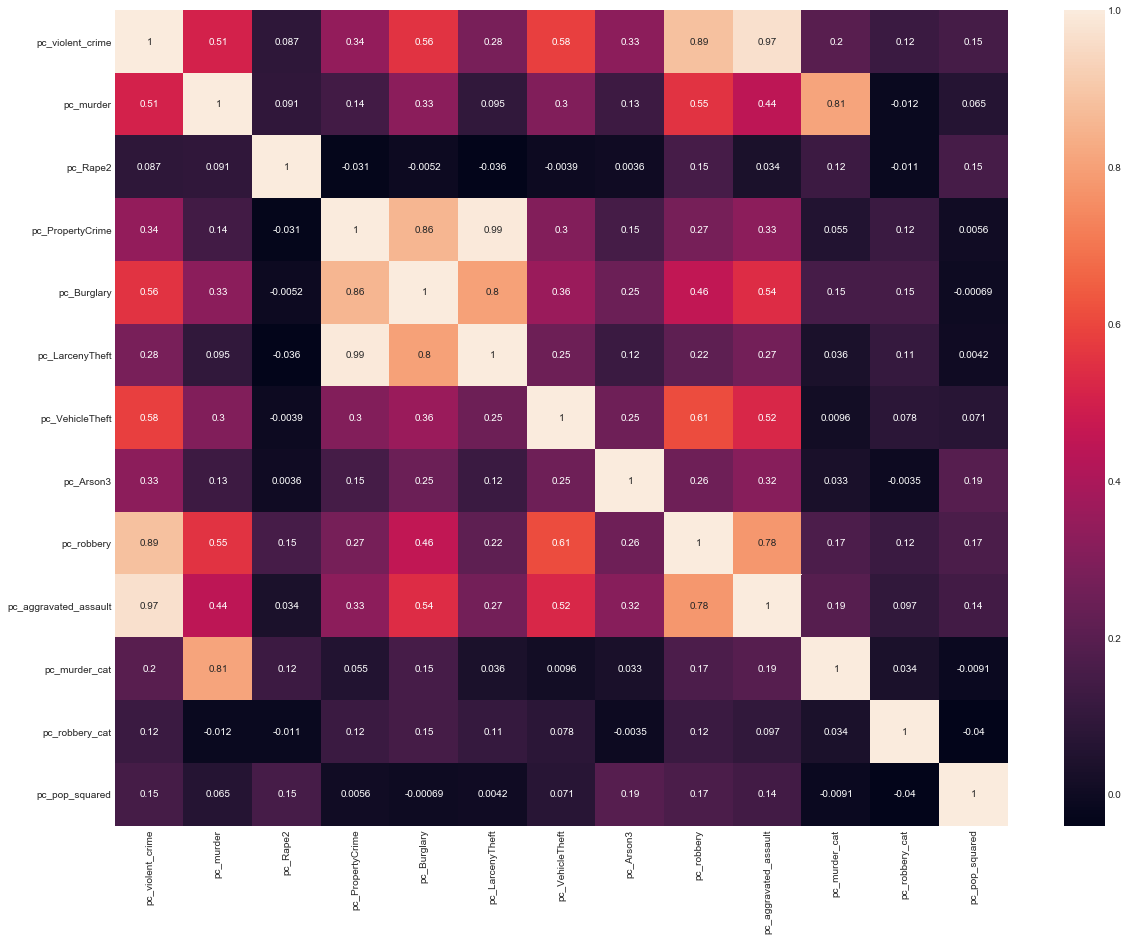

In [20]:
plt.subplots(figsize=(20,15))
sns.heatmap(per_capita_df.corr(), annot=True)

In [21]:
per_capita_df.dropna(axis=0, how='any')

City  pc_violent_crime  pc_murder  pc_Rape2  \
0                 Adams Village             0.000      0.000     0.000   
1      Addison Town and Village            77.882      0.000     0.000   
3                 Akron Village            35.186      0.000     0.000   
11           Amityville Village           126.196      0.000     0.000   
12                    Amsterdam           149.180      0.000     0.000   
14               Arcade Village             0.000      0.000     0.000   
16            Asharoken Village             0.000      0.000     0.000   
17               Attica Village             0.000      0.000     0.000   
27                  Black River             0.000      0.000     0.000   
29                  Bolton Town             0.000      0.000     0.000   
30            Boonville Village            48.709      0.000     0.000   
31                   Brant Town            48.473      0.000     0.000   
32                     Brewster             0.000      0.000     0.000   
33     Briarcliff Manor Village            24.814      0.000     0.000   
36           Bronxville Village            31.148      0.000     0.000   
37           Brownville Village             0.000      0.000     0.000   
41               Camden Village            90.334      0.000     0.000   
42    Camillus Town and Village            53.483      0.000     0.000   
43          Canajoharie Village            46.125      0.000     0.000   
46             Canisteo Village            44.723      0.000     0.000   
49                 Carroll Town           115.574      0.000     0.000   
51          Cattaraugus Village           102.564      0.000     0.000   
54       Central Square Village           217.510      0.000     0.000   
56              Chatham Village             0.000      0.000     0.000   
65           Cobleskill Village             0.000      0.000     0.000   
66                Coeymans Town           268.781     13.439     0.000   
71   Cornwall-on-Hudson Village            67.476      0.000     0.000   
79                  Dewitt Town            88.176      0.000     0.000   
80               Dexter Village             0.000      0.000     0.000   
81          Dobbs Ferry Village            27.022      0.000     0.000   
..                          ...               ...        ...       ...   
284    Rockville Centre Village            70.460      0.000     0.000   
287              Rotterdam Town            44.308      3.408     0.000   
288        Rouses Point Village             0.000      0.000     0.000   
290           Rye Brook Village            20.956      0.000     0.000   
292          Sag Harbor Village             0.000      0.000     0.000   
294         Sands Point Village             0.000      0.000     0.000   
297             Saugerties Town            57.211      0.000     0.000   
298           Scarsdale Village             5.647      0.000     0.000   
301           Schoharie Village             0.000      0.000     0.000   
308         Shortsville Village             0.000      0.000     0.000   
310         Skaneateles Village            40.766      0.000     0.000   
311       Sleepy Hollow Village            79.594      0.000     0.000   
314              Solvay Village           293.799      0.000     0.000   
316         Southampton Village            63.331      0.000     0.000   
321             Stillwater Town             0.000      0.000     0.000   
323              Stockport Town             0.000      0.000     0.000   
325             Suffern Village            45.558      9.112     0.000   
327           Tarrytown Village            52.034      0.000     0.000   
331                        Troy           700.701     14.014     0.000   
333            Tuckahoe Village            30.211      0.000     0.000   
335         Tuxedo Park Village             0.000      0.000     0.000   
339              Vernon Village            85.763      0.000     0.000   
345     Washingtonville Village

In [ ]:
# THIS. Use .loc
# X = per_capita_df.loc[:,['pc_violent_crime','pc_aggravated_assault','pc_murder']]

In [22]:
# Create a dataframe where the NaNs are the same, and then set up for Regression
prep_df = per_capita_df.loc[:,['pc_PropertyCrime','pc_violent_crime','pc_aggravated_assault','pc_murder']].dropna(axis=0, how='any')

In [23]:
# Instantiate and fit our model.
regr = linear_model.LinearRegression()

Y = prep_df['pc_PropertyCrime'].values.reshape(-1, 1)
X = prep_df.loc[:,['pc_violent_crime','pc_aggravated_assault','pc_murder']]
regr.fit(X, Y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

# R_Squared value is .12 for 2014 model

In [29]:
# Inspect the results.
print('\nCoefficients: pc_violent_crime, pc_aggravated_assault, pc_murder \n' , regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))


Coefficients: pc_violent_crime, pc_aggravated_assault, pc_murder 
 [[  5.21512328  -2.44214591 -29.5462428 ]]

Intercept: 
 [1245.76920466]

R-squared:
0.12115110436991249


# Next up, take data trained on 2014 and run on 2013 Data

In [25]:
data_raw_2013 = pd.read_csv(open('known_offenses_nyc2013.csv','rU'), encoding='utf-8', engine='c')

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 'U' mode is deprecated
  """Entry point for launching an IPython kernel.


In [26]:
data_raw_2013.dtypes

City                                       object
Population                                 object
Violent\ncrime                             object
Murder and\nnonnegligent\nmanslaughter    float64
Rape\n(revised\ndefinition)1              float64
Rape\n(legacy\ndefinition)2                object
Robbery                                    object
Aggravated\nassault                        object
Property\ncrime                            object
Burglary                                   object
Larceny-\ntheft                            object
Motor\nvehicle\ntheft                      object
Arson3                                    float64
Unnamed: 13                               float64
dtype: object

In [31]:
data_raw_2013['robbery_num'] = pd.to_numeric(data_raw_2013['Robbery'].str.replace(',',''))
data_raw_2013['robbery_cat'] = np.where((data_raw_2013['robbery_num'] > 0),1,0)
data_raw_2013['Murder_Cat']  = np.where((data_raw_2013['Murder and\nnonnegligent\nmanslaughter'] > 0),1,0)

In [32]:
data_raw_2013['pop_num']          = pd.to_numeric(data_raw_2013['Population'].str.replace(',',''))
data_raw_2013['Burglary']         = pd.to_numeric(data_raw_2013['Burglary'].str.replace(',',''))
data_raw_2013['ViolentCrime']     = pd.to_numeric(data_raw_2013['Violent\ncrime'].str.replace(',',''))
data_raw_2013['LarcenyTheft']     = pd.to_numeric(data_raw_2013['Larceny-\ntheft'].str.replace(',',''))
data_raw_2013['VehicleTheft']     = pd.to_numeric(data_raw_2013['Motor\nvehicle\ntheft'].str.replace(',',''))
data_raw_2013['AggravatedAssault'] = pd.to_numeric(data_raw_2013['Aggravated\nassault'].str.replace(',',''))
data_raw_2013['PropertyCrime']    = pd.to_numeric(data_raw_2013['Property\ncrime'].str.replace(',',''))
data_raw_2013['pop_squared']      = data_raw_2013['pop_num']**2

In [49]:
data_raw_2013['Rape2']    = pd.to_numeric(data_raw_2013['Rape\n(legacy\ndefinition)2'].str.replace(',',''))

In [50]:
data_raw_2013.dtypes

City                                       object
Population                                 object
Violent\ncrime                             object
Murder and\nnonnegligent\nmanslaughter    float64
Rape\n(revised\ndefinition)1              float64
Rape\n(legacy\ndefinition)2                object
Robbery                                    object
Aggravated\nassault                        object
Property\ncrime                            object
Burglary                                  float64
Larceny-\ntheft                            object
Motor\nvehicle\ntheft                      object
Arson3                                    float64
Unnamed: 13                               float64
robbery_num                               float64
robbery_cat                                 int64
Murder_Cat                                  int64
pop_num                                   float64
ViolentCrime                              float64
LarcenyTheft                              float64


In [42]:
data_raw_2013

City Population  \
0                                        Adams Village      1,861   
1                             Addison Town and Village      2,577   
2                                        Akron Village      2,846   
3                                               Albany     97,956   
4                                       Albion Village      6,388   
5                                       Alfred Village      4,089   
6                                     Allegany Village      1,781   
7                                         Amherst Town    118,296   
8                                   Amityville Village      9,519   
9                                            Amsterdam     18,182   
10                                      Arcade Village      2,053   
11                                     Ardsley Village      4,523   
12                                   Asharoken Village        658   
13                                      Attica Village      2,522   
14                                              Auburn     27,270   
15                                        Avon Village      3,333   
16                               Baldwinsville Village      7,473   
17                                Ballston Spa Village      5,418   
18                                             Batavia     15,374   
19                                        Bath Village      5,733   
20                                        Bedford Town     17,627   
21                                      Bethlehem Town     34,243   
22                                          Binghamton     46,304   
23                                         Black River      1,410   
24                                 Blooming Grove Town     12,001   
25                                     Bolivar Village      1,022   
26                                         Bolton Town      2,325   
27                                   Boonville Village      2,054   
28                                          Brant Town      2,065   
29                                            Brewster      2,358   
..                                                 ...        ...   
321                                              Utica     61,686   
322                                        Vestal Town     27,980   
323                                     Walden Village      6,887   
324                                      Wallkill Town     27,940   
325                                     Walton Village      3,012   
326                                     Warsaw Village      3,453   
327                            Washingtonville Village      5,828   
328                         Waterford Town and Village      8,392   
329                                   Waterloo Village      5,175   
330                                          Watertown     28,179   
331                                         Watervliet     10,245   
332                               Watkins Glen Village      1,862   
333                                    Waverly Village      4,337   
334                           Webster Town and Village     43,777   
335                                  Weedsport Village      1,797   
336                                 Wellsville Village      4,574   
337                          Westhampton Beach Village      1,732   
338                                   West Seneca Town     44,821   
339                                  Whitehall Village      2,604   
340                                       White Plains     57,559   
341                                 Whitesboro Village      3,733   
342                                    Whitestown Town      9,141   
343                                      Woodbury Town     10,685   
344                                  Woodridge Village        829   
345                                     Woodstock Town      5,931   
346                                            Yonkers    199,134   
347                                      Yorktow

In [51]:
data_raw_2013.columns

Index(['City', 'Population', 'Violent\ncrime',
       'Murder and\nnonnegligent\nmanslaughter',
       'Rape\n(revised\ndefinition)1', 'Rape\n(legacy\ndefinition)2',
       'Robbery', 'Aggravated\nassault', 'Property\ncrime', 'Burglary',
       'Larceny-\ntheft', 'Motor\nvehicle\ntheft', 'Arson3', 'Unnamed: 13',
       'robbery_num', 'robbery_cat', 'Murder_Cat', 'pop_num', 'ViolentCrime',
       'LarcenyTheft', 'VehicleTheft', 'AggravatedAssault', 'PropertyCrime',
       'pop_squared', 'pc_violent_crime', 'pc_murder', 'Rape2'],
      dtype='object')

In [53]:
# Change 2013 Data to "kind of sort of per capita"
data_raw_2013['pc_violent_crime'] = (data_raw_2013['ViolentCrime']/data_raw_2013['pop_num'])*100000
data_raw_2013['pc_murder'] = (data_raw_2013['Murder and\nnonnegligent\nmanslaughter']/data_raw_2013.pop_num)*100000


In [55]:
data_raw_2013['pc_Rape2'] = (data_raw_2013['Rape2']/data_raw_2013.pop_num)*100000

In [56]:

data_raw_2013['pc_PropertyCrime'] = (data_raw_2013.PropertyCrime/data_raw_2013.pop_num)*100000
data_raw_2013['pc_Burglary'] = (data_raw_2013.Burglary/data_raw_2013.pop_num)*100000
data_raw_2013['pc_LarcenyTheft'] = (data_raw_2013.LarcenyTheft/data_raw_2013.pop_num)*100000
data_raw_2013['pc_VehicleTheft'] = (data_raw_2013.VehicleTheft/data_raw_2013.pop_num)*100000
data_raw_2013['pc_Arson3'] = (data_raw_2013.Arson3/data_raw_2013.pop_num)*100000
data_raw_2013['pc_robbery'] = (data_raw_2013.robbery_num/data_raw_2013.pop_num)*100000
data_raw_2013['pc_aggravated_assault'] = (data_raw_2013.AggravatedAssault/data_raw_2013.pop_num)*100000
data_raw_2013['pc_murder_cat'] = (data_raw_2013.Murder_Cat/data_raw_2013.pop_num)*100000
data_raw_2013['pc_robbery_cat'] = (data_raw_2013.robbery_cat/data_raw_2013.pop_num)*100000
data_raw_2013['pc_pop_squared'] = (data_raw_2013.pop_squared/data_raw_2013.pop_num)*100000




In [57]:
data_raw_2013_df = data_raw_2013.loc[:, lambda df: ['City','pc_violent_crime', 'pc_murder','pc_Rape2','pc_PropertyCrime',
                                   'pc_Burglary','pc_LarcenyTheft','pc_VehicleTheft','pc_Arson3',
                                  'pc_robbery','pc_aggravated_assault','pc_murder_cat','pc_robbery_cat',
                                  'pc_pop_squared']]

In [58]:
data_raw_2013_df

City  pc_violent_crime  \
0                                        Adams Village             0.000   
1                             Addison Town and Village           116.414   
2                                        Akron Village           105.411   
3                                               Albany           807.505   
4                                       Albion Village           360.050   
5                                       Alfred Village           122.279   
6                                     Allegany Village           168.445   
7                                         Amherst Town            90.451   
8                                   Amityville Village            94.548   
9                                            Amsterdam           164.998   
10                                      Arcade Village             0.000   
11                                     Ardsley Village           110.546   
12                                   Asharoken Village             0.000   
13                                      Attica Village            79.302   
14                                              Auburn           352.035   
15                                        Avon Village            30.003   
16                               Baldwinsville Village            66.908   
17                                Ballston Spa Village           147.656   
18                                             Batavia           370.756   
19                                        Bath Village           261.643   
20                                        Bedford Town            28.366   
21                                      Bethlehem Town            37.964   
22                                          Binghamton           613.338   
23                                         Black River             0.000   
24                                 Blooming Grove Town            66.661   
25                                     Bolivar Village            97.847   
26                                         Bolton Town            86.022   
27                                   Boonville Village            48.685   
28                                          Brant Town           193.705   
29                                            Brewster             0.000   
..                                                 ...               ...   
321                                              Utica           585.222   
322                                        Vestal Town            57.184   
323                                     Walden Village           261.362   
324                                      Wallkill Town           143.164   
325                                     Walton Village           199.203   
326                                     Warsaw Village           173.762   
327                            Washingtonville Village            34.317   
328                         Waterford Town and Village            47.664   
329                                   Waterloo Village           212.560   
330                                          Watertown           386.813   
331                                         Watervliet           253.782   
332                               Watkins Glen Village           322.234   
333                                    Waverly Village           115.287   
334                           Webster Town and Village            47.970   
335                                  Weedsport Village             0.000   
336                                 Wellsville Village           240.490   
337                          Westhampton Beach Village           115.473   
338                                   West Seneca Town            78.088   
339                                  Whitehall Village           230.415   
340                                       White Plains           135.513   
341                                 Whitesboro Village           107.152   
342                   

In [61]:
data_raw_2013_df

City  pc_violent_crime  \
0                                        Adams Village             0.000   
1                             Addison Town and Village           116.414   
2                                        Akron Village           105.411   
3                                               Albany           807.505   
4                                       Albion Village           360.050   
5                                       Alfred Village           122.279   
6                                     Allegany Village           168.445   
7                                         Amherst Town            90.451   
8                                   Amityville Village            94.548   
9                                            Amsterdam           164.998   
10                                      Arcade Village             0.000   
11                                     Ardsley Village           110.546   
12                                   Asharoken Village             0.000   
13                                      Attica Village            79.302   
14                                              Auburn           352.035   
15                                        Avon Village            30.003   
16                               Baldwinsville Village            66.908   
17                                Ballston Spa Village           147.656   
18                                             Batavia           370.756   
19                                        Bath Village           261.643   
20                                        Bedford Town            28.366   
21                                      Bethlehem Town            37.964   
22                                          Binghamton           613.338   
23                                         Black River             0.000   
24                                 Blooming Grove Town            66.661   
25                                     Bolivar Village            97.847   
26                                         Bolton Town            86.022   
27                                   Boonville Village            48.685   
28                                          Brant Town           193.705   
29                                            Brewster             0.000   
..                                                 ...               ...   
321                                              Utica           585.222   
322                                        Vestal Town            57.184   
323                                     Walden Village           261.362   
324                                      Wallkill Town           143.164   
325                                     Walton Village           199.203   
326                                     Warsaw Village           173.762   
327                            Washingtonville Village            34.317   
328                         Waterford Town and Village            47.664   
329                                   Waterloo Village           212.560   
330                                          Watertown           386.813   
331                                         Watervliet           253.782   
332                               Watkins Glen Village           322.234   
333                                    Waverly Village           115.287   
334                           Webster Town and Village            47.970   
335                                  Weedsport Village             0.000   
336                                 Wellsville Village           240.490   
337                          Westhampton Beach Village           115.473   
338                                   West Seneca Town            78.088   
339                                  Whitehall Village           230.415   
340                                       White Plains           135.513   
341                                 Whitesboro Village           107.152   
342                   

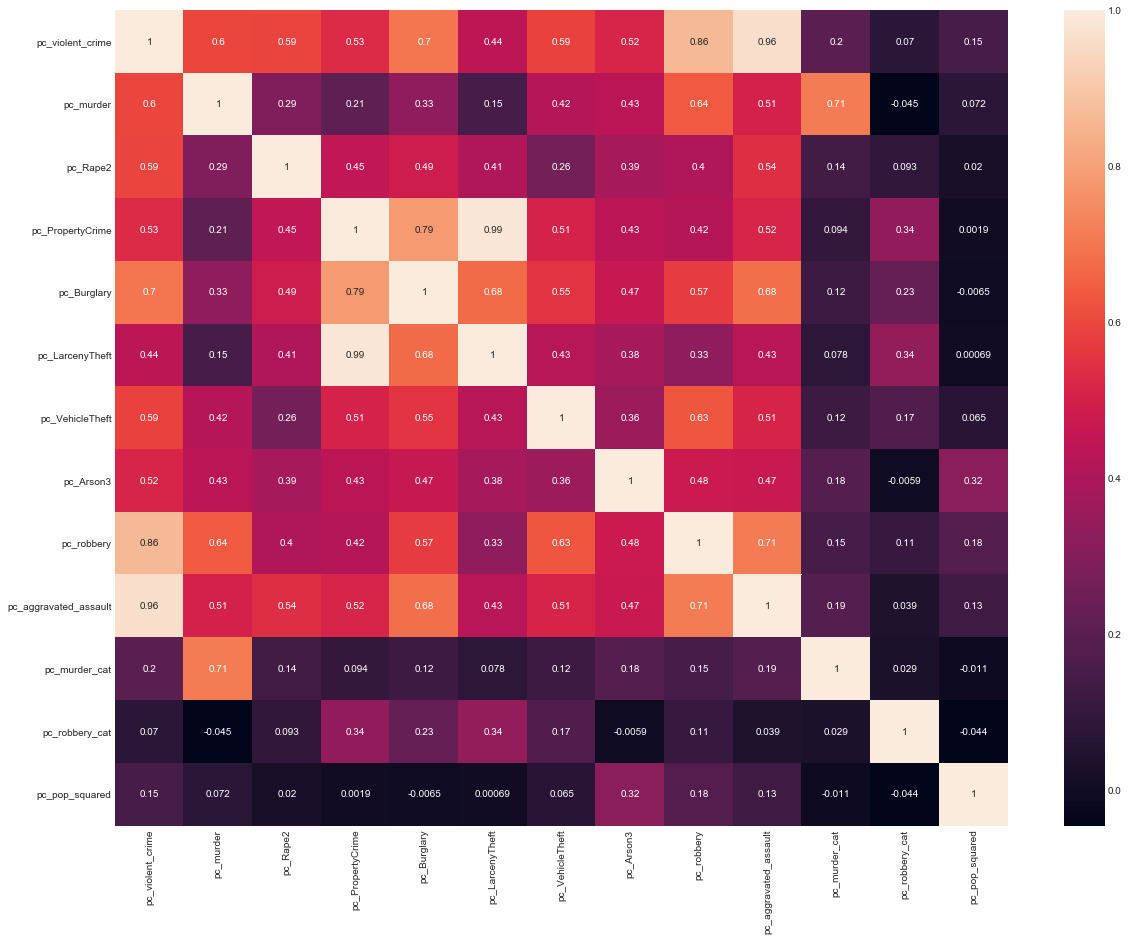

In [62]:
plt.subplots(figsize=(20,15))
sns.heatmap(data_raw_2013_df.corr(), annot=True)

In [63]:
data_raw_2013_df.dropna(axis=0, how='any')

City  pc_violent_crime  pc_murder  pc_Rape2  \
0                 Adams Village             0.000      0.000     0.000   
1      Addison Town and Village           116.414      0.000     0.000   
2                 Akron Village           105.411      0.000     0.000   
6              Allegany Village           168.445      0.000     0.000   
7                  Amherst Town            90.451      0.845     5.917   
8            Amityville Village            94.548      0.000    21.011   
9                     Amsterdam           164.998      0.000     0.000   
10               Arcade Village             0.000      0.000     0.000   
11              Ardsley Village           110.546      0.000     0.000   
12            Asharoken Village             0.000      0.000     0.000   
13               Attica Village            79.302      0.000     0.000   
16        Baldwinsville Village            66.908      0.000     0.000   
17         Ballston Spa Village           147.656      0.000     0.000   
19                 Bath Village           261.643      0.000    17.443   
23                  Black River             0.000      0.000     0.000   
25              Bolivar Village            97.847      0.000     0.000   
26                  Bolton Town            86.022      0.000     0.000   
27            Boonville Village            48.685      0.000     0.000   
28                   Brant Town           193.705      0.000     0.000   
29                     Brewster             0.000      0.000     0.000   
30     Briarcliff Manor Village            12.538      0.000     0.000   
33           Bronxville Village             0.000      0.000     0.000   
34           Brownville Village             0.000      0.000     0.000   
38               Camden Village           225.327      0.000     0.000   
39    Camillus Town and Village            57.935      0.000     4.138   
42             Canisteo Village           133.571      0.000     0.000   
44         Cape Vincent Village             0.000      0.000     0.000   
45                  Carmel Town            29.017      0.000     5.803   
46                 Carroll Town             0.000      0.000     0.000   
48          Cattaraugus Village             0.000      0.000     0.000   
..                          ...               ...        ...       ...   
283             Saugerties Town            77.648      0.000    15.530   
287           Schoharie Village             0.000      0.000     0.000   
292         Shelter Island Town           124.378      0.000     0.000   
293           Sherburne Village            74.019      0.000     0.000   
295         Shortsville Village             0.000      0.000     0.000   
297         Skaneateles Village             0.000      0.000     0.000   
298       Sleepy Hollow Village            80.032     10.004     0.000   
300              Solvay Village           292.893      0.000     0.000   
301            Southampton Town            86.951      0.000    11.857   
306             Stillwater Town            15.181      0.000     0.000   
309             Suffern Village            82.675      0.000     0.000   
310                    Syracuse           828.733     14.600    52.143   
311           Tarrytown Village            52.406      0.000     0.000   
313                   Tonawanda           226.863      0.000     0.000   
314              Tonawanda Town           203.161      1.722     8.609   
315                        Troy           743.517      2.004    28.057   
317            Tuckahoe Village             0.000      0.000     0.000   
319         Tuxedo Park Village             0.000      0.000     0.000   
324               Wallkill Town           143.164      0.000    10.737   
326              Warsaw Village           173.762      0.000    28.960   
327     Washingtonville Village            34.317      0.000     0.000   
328  Waterford Town and Village            47.664      0.000     0.000   
335           Weedsport Village

In [66]:
prep_df_2013 = data_raw_2013_df.loc[:,['pc_PropertyCrime','pc_violent_crime','pc_aggravated_assault','pc_murder']].dropna(axis=0, how='any')

In [67]:
prep_df_2013

pc_PropertyCrime  pc_violent_crime  pc_aggravated_assault  pc_murder
0             644.815             0.000                  0.000      0.000
1             931.315           116.414                116.414      0.000
2             562.193           105.411                105.411      0.000
3            4175.344           807.505                536.976      8.167
4            3490.920           360.050                250.470      0.000
5            1124.969           122.279                 48.912      0.000
6             561.482           168.445                168.445      0.000
7            1790.424            90.451                 57.483      0.845
8            2206.114            94.548                 31.516      0.000
9            2227.478           164.998                 98.999      0.000
10           1899.659             0.000                  0.000      0.000
11            729.604           110.546                 44.218      0.000
12            303.951             0.000                  0.000      0.000
13            198.255            79.302                 79.302      0.000
14           3149.982           352.035                194.353      3.667
15            750.075            30.003                  0.000      0.000
16           1177.573            66.908                 53.526      0.000
17           1734.958           147.656                 92.285      0.000
18           3636.009           370.756                240.666      0.000
19           3331.589           261.643                191.872      0.000
20            885.006            28.366                 22.692      0.000
21           1290.775            37.964                 29.203      0.000
22           5072.996           613.338                347.702      6.479
23            992.908             0.000                  0.000      0.000
24            824.931            66.661                 58.328      0.000
25            391.389            97.847                 97.847      0.000
26           1032.258            86.022                 86.022      0.000
27            973.710            48.685                 48.685      0.000
28           1501.211           193.705                145.278      0.000
29            551.315             0.000                  0.000      0.000
..                ...               ...                    ...        ...
318          2278.968            82.372                 82.372      0.000
319             0.000             0.000                  0.000      0.000
320          3583.436           114.801                 73.801      0.000
321          4098.175           585.222                364.751     11.348
322          2040.743            57.184                 28.592      0.000
323          2061.856           261.362                203.282     14.520
324          2745.168           143.164                 75.161      0.000
325          2257.636           199.203                166.003      0.000
326          2258.905           173.762                144.802      0.000
327           995.196            34.317                 17.159      0.000
328           703.051            47.664                 47.664      0.000
329          3748.792           212.560                154.589      0.000
330          4134.284           386.813                287.448      0.000
331          2362.128           253.782                107.369      9.761
332          4940.924           322.234                322.234      0.000
333          1245.100           115.287                 92.230      0.000
334          1071.339            47.970                 36.549      0.000
335          1391.208             0.000                  0.000      0.000
336          3585.483           240.490                218.627      0.000
337          2540.416           115.473                115.473      0.000
338          1999.063            78.088                 53.546      2.231
339          2380.952           230.415                230.415      0.000
340      

In [68]:
# Be careful now- 
# Instantiate and fit our model.
# DO NOT REFIT REGRESSION!!!

# regr = linear_model.LinearRegression()

Y_2013 = prep_df_2013['pc_PropertyCrime'].values.reshape(-1, 1)
X_2013 = prep_df_2013.loc[:,['pc_violent_crime','pc_aggravated_assault','pc_murder']]
regr.fit(X_2013, Y_2013)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

# The R_Squared value is .30 this time around. So the model fits the 2013 better than the 2014 data it was actually trained on.

In [69]:
# Inspect the results.
print('\nCoefficients: pc_violent_crime, pc_aggravated_assault, pc_murder \n' , regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X_2013, Y_2013))


Coefficients: pc_violent_crime, pc_aggravated_assault, pc_murder 
 [[  5.36910744  -1.3311642  -77.18492508]]

Intercept: 
 [1348.52550001]

R-squared:
0.3025669911352785


In [ ]:
# Make sure train on 2014, test on 2013
X_2013, Y_2013

# Make sure I don't fit on 2013 data (regression model is regr- test for score)

In [ ]:
# Now, compare to 2013 Data


In [ ]:
# Show scatter plots